In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
# from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential 
#from tensorflow.keras.layers import MaxPool2D, Conv2D, Dropout, BatchNormalization
import numpy as np
from glob import glob

In [ ]:
! git clone https://github.com/Peter-TMK/Hamoye_capstone_project_smote.git

fatal: destination path 'Hamoye_capstone_project_smote' already exists and is not an empty directory.


(282, 400, 3)


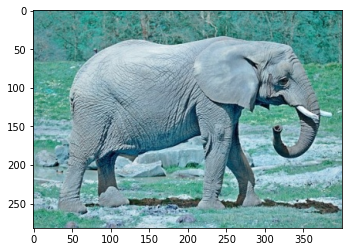

In [ ]:
img = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Elephant/Elephant_111.jpg")
plt.imshow(img)
print(img.shape)

(282, 400, 3)
(266, 400, 3)
(266, 400, 3)
(286, 400, 3)
(339, 400, 3)
(266, 400, 3)


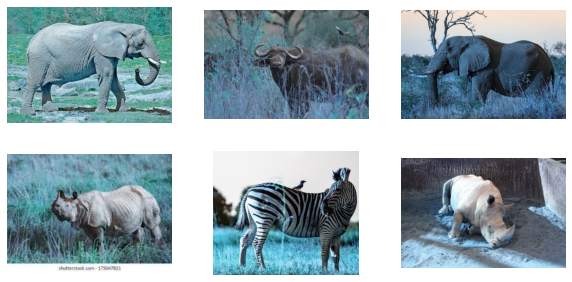

In [ ]:
fig = plt.figure(figsize= (10,5))

img1 = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Elephant/Elephant_111.jpg")
img2 = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Buffalo/Buffalo_104.jpg")
img3 = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Elephant/Elephant_101.jpg")
img4 = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Rhino/Rhino_107.jpg")
img5 = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Zebra/Zebra_104.jpg")
img6 = cv2.imread("/content/Hamoye_capstone_project_smote/Data/train/Rhino/Rhino_112.jpg")

fig.add_subplot(2,3,1)
plt.imshow(img1)
plt.axis('off')
print(img1.shape)

fig.add_subplot(2,3,2)
plt.imshow(img2)
plt.axis('off')
print(img2.shape)

fig.add_subplot(2,3,3)
plt.imshow(img3)
plt.axis('off')
print(img3.shape)

fig.add_subplot(2,3,4)
plt.imshow(img4)
plt.axis('off')
print(img4.shape)

fig.add_subplot(2,3,5)
plt.imshow(img5)
plt.axis('off')
print(img5.shape)

fig.add_subplot(2,3,6)
plt.imshow(img6)
plt.axis('off')
print(img6.shape)

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "/content/Hamoye_capstone_project_smote/Data/train"
valid_path = "/content/Hamoye_capstone_project_smote/Data/val"
test_path = "/content/Hamoye_capstone_project_smote/Data/test"

In [ ]:
# folder = glob("/content/Hamoye_capstone_project_smote/Data/train")

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_gen = train_datagen.flow_from_directory('/content/Hamoye_capstone_project_smote/Data/train',
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 32,
                                                 seed=42,
                                                shuffle=True,
                                                 class_mode = 'categorical')

validation_gen = test_datagen.flow_from_directory('/content/Hamoye_capstone_project_smote/Data/val',
                                            target_size = IMAGE_SIZE,
                                            batch_size = 32,
                                            seed=42,
                                            shuffle=True,
                                            class_mode = 'categorical')
# test_datagen = ImageDataGenerator(rescale=1/255)
test_gen=test_datagen.flow_from_directory(test_path,
                                            target_size= IMAGE_SIZE,
                                            batch_size= 32,
                                            seed= 42,
                                            shuffle= False,
                                            class_mode="categorical")
# test_generator=test_datagen.flow_from_directory(
#    "/content/Hamoye_capstone_project_smote/Data/test",
#     target_size=(224,224),
#     batch_size=32,
#     seed=42,
#     shuffle=True,
#     class_mode="categorical")

Found 7556 images belonging to 4 classes.
Found 2160 images belonging to 4 classes.
Found 1084 images belonging to 4 classes.


In [ ]:
# checking for the classes of our label
training_gen.class_indices

{'Buffalo': 0, 'Elephant': 1, 'Rhino': 2, 'Zebra': 3}

In [ ]:
# this represents our test actual values and their classes.
test_gen.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
print(len(test_gen.classes))

1084


In [ ]:
vgg_19 = VGG19(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=4,
    classifier_activation='softmax'
)
vgg_19.trainable = False

In [ ]:
from keras import Sequential
from keras.layers import Dense,Flatten
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential([
    vgg_19
])
model.add(Conv2D(512, kernel_size=(1,1), activation='relu'))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Dropout(0.5))
    
model.add(Conv2D(512, kernel_size=(1,1), activation='relu'))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Dropout(0.5))
    
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.8))

model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.summary()

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
model.compile(optimizer = optimizer, 
              loss = tf.keras.losses.CategoricalCrossentropy(), 
              metrics = ['accuracy'])
STEP_SIZE_TRAIN = training_gen.n // training_gen.batch_size
STEP_SIZE_VALID = validation_gen.n // validation_gen.batch_size

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 512)         262656    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 512)        0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 4, 4, 512)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 512)         262656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2, 512)        0         
 2D)                                                  

In [ ]:
# Some callback functions for fine tuning the model
#from keras.callbacks import ModelCheckpoint, Earlystopping, ReduceLROnPlateau
EarlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, min_delta=1e-4)
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, cooldown=0, min_lr=1e-7, verbose=1)
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Hamoye_folder/vgg19.h5', verbose=1, save_best_only=True, save_weights_only=True, mode='auto')

In [ ]:
history = model.fit(x = training_gen,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = validation_gen,
          validation_steps = STEP_SIZE_VALID,
          epochs = 10, callbacks=[EarlyStop, ReduceLROnPlateau, Checkpoint])

Epoch 1/10
236/236 [==============================] - ETA: 0s - loss: 1.8105 - accuracy: 0.2727
Epoch 1: val_loss improved from inf to 1.30593, saving model to /content/drive/MyDrive/Hamoye_folder/vgg19.h5
236/236 [==============================] - 169s 683ms/step - loss: 1.8105 - accuracy: 0.2727 - val_loss: 1.3059 - val_accuracy: 0.5802 - lr: 1.0000e-04
Epoch 2/10
236/236 [==============================] - ETA: 0s - loss: 1.2976 - accuracy: 0.3830
Epoch 2: val_loss improved from 1.30593 to 0.99470, saving model to /content/drive/MyDrive/Hamoye_folder/vgg19.h5
236/236 [==============================] - 159s 675ms/step - loss: 1.2976 - accuracy: 0.3830 - val_loss: 0.9947 - val_accuracy: 0.7006 - lr: 1.0000e-04
Epoch 3/10
236/236 [==============================] - ETA: 0s - loss: 0.9698 - accuracy: 0.5276
Epoch 3: val_loss improved from 0.99470 to 0.81269, saving model to /content/drive/MyDrive/Hamoye_folder/vgg19.h5
236/236 [==============================] - 152s 644ms/step - loss: 0.9

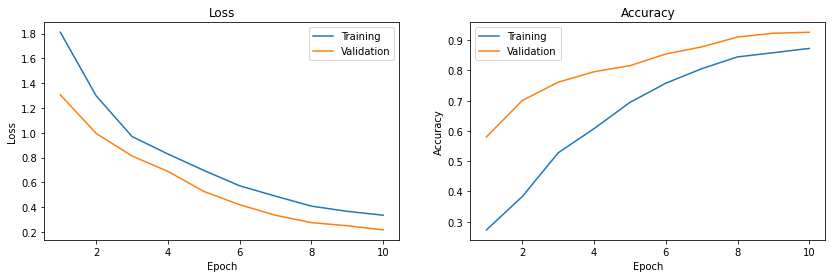

In [ ]:
history = history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['accuracy'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_gen)

34/34 [==============================] - 16s 468ms/step - loss: 0.2294 - accuracy: 0.9197


[0.22935311496257782, 0.919741690158844]

In [ ]:
# getting the prediction of the model
pred_model = model.predict(test_gen)
pred_model

array([[9.8701733e-01, 1.0953391e-02, 1.7132530e-03, 3.1605942e-04],
       [9.7907341e-01, 6.7531001e-03, 1.4072944e-02, 1.0051362e-04],
       [3.7166864e-01, 5.4563280e-02, 5.6674433e-01, 7.0237252e-03],
       ...,
       [7.9914670e-08, 1.7046723e-07, 2.1637152e-09, 9.9999976e-01],
       [5.6184929e-10, 2.0353577e-09, 2.1680180e-11, 1.0000000e+00],
       [4.0296666e-07, 5.0336985e-07, 2.5749401e-08, 9.9999905e-01]],
      dtype=float32)

In [ ]:
y_predict = pred_model.argmax(axis=1)
y_predict

array([0, 0, 2, ..., 3, 3, 3])

In [ ]:
y_true= test_gen.classes

In [ ]:
# calculate f1_score
from sklearn.metrics import f1_score
f1_score(y_true,y_predict,average='macro')

0.9191287985070162

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_true,y_predict)

array([[251,   8,  12,   0],
       [ 20, 221,  27,   3],
       [  5,  10, 256,   0],
       [  1,   0,   1, 269]])

In [ ]:
print(classification_report(y_true,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       271
           1       0.92      0.82      0.87       271
           2       0.86      0.94      0.90       271
           3       0.99      0.99      0.99       271

    accuracy                           0.92      1084
   macro avg       0.92      0.92      0.92      1084
weighted avg       0.92      0.92      0.92      1084



In [ ]:
import pickle
# save as pickle
pickle.dump(model,open('vgg_19','wb'))

INFO:tensorflow:Assets written to: ram://b6e73798-e4b1-46cb-b8c1-40034ae9836e/assets


In [ ]:
# save as hdf5 file
# from tensorflow.keras.models import load_model
# model.save("vgg_19.hdf5")

In [ ]:
# y_pred = model.predict(test_datagen, steps=(test_datagen.n // batch_size) + 1, verbose=1)